<a href="https://colab.research.google.com/github/adxpillar/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/adeagbo_adewale_DS13__DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


In [4]:
sales_fig = [3505,2400,3027,2798,3700,3250,2689]
Days = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
sales = {'Days': Days,'Sales': sales_fig}

df = pd.DataFrame(sales)
df.head(7)

,Days,Sales
0,Mon,3505
1,Tue,2400
2,Wed,3027
3,Thur,2798
4,Fri,3700
5,Sat,3250
6,Sun,2689


In [10]:
#Mean 
df_mean = (df['Sales'].sum()/len(df))
df_mean

3052.714285714286

In [11]:
#variance 
df['distance'] = df['Sales'] - df_mean
df['squared_distance'] = df['distance']**2

,Days,Sales,distance,squared_distance
0,Mon,3505,452.285714,204562.367347
1,Tue,2400,-652.714286,426035.938776
2,Wed,3027,-25.714286,661.224490
3,Thur,2798,-254.714286,64879.367347
4,Fri,3700,647.285714,418978.795918


In [12]:
observations = len(df)
print("Number of observations: ",observations)

sales_variance = df['squared_distance'].sum()/(observations - 1)
print('Variance: ', sales_variance)

Number of observations:  7
Variance:  214387.90476190473


In [19]:
# standard deviation 
import math
sales_std = math.sqrt(sales_variance)
sales_std

463.0204150595357

In [25]:
sales_std = sales_variance**.5
sales_std

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
df['customers'] = [127,80,105,92,120,115,93]

In [27]:
df.cov()

,Sales,distance,squared_distance,customers
Sales,2.143879e+05,2.143879e+05,4.776800e+06,7604.357143
distance,2.143879e+05,2.143879e+05,4.776800e+06,7604.357143
squared_distance,4.776800e+06,4.776800e+06,3.095725e+10,-226038.914966
customers,7.604357e+03,7.604357e+03,-2.260389e+05,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [32]:
#Mean 
customers_mean = (df['customers'].sum()/len(df))
#variance 
df['cust_distance'] = df['customers'] - customers_mean
df['squared_cust_distance'] = df['cust_distance']**2
observations = len(df)
print("Number of observations: ",observations)

customer_variance = df['squared_cust_distance'].sum()/(observations - 1)
print('Variance: ', customer_variance)
customer_std = customer_variance**.5
print(customer_std)

Number of observations:  7
Variance:  290.95238095238096
17.057326313123664


In [31]:
#crosscheck 
np.std(df.customers,ddof=1)

17.057326313123664

In [35]:
sales_cust_cov = 7604.357143
joint_std = sales_std*customer_std
sales_corr = sales_cust_cov/joint_std
print("The correlation is: ",sales_corr)

The correlation is:  0.962833977832979


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [2]:
# names = ['"pclass","survived","name","sex","age","sibsp","parch","ticket","fare","cabin","embarked","boat","body","home.dest","has_cabin_number"']
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv',index_col=None)
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
# Drop variables with missing values 
df.drop(['Unnamed: 0','name','home.dest','body','cabin','boat'],axis=1,inplace=True)

In [4]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,has_cabin_number
0,1.0,1.0,female,29.0000,0.0,0.0,24160,211.3375,S,1
1,1.0,1.0,male,0.9167,1.0,2.0,113781,151.5500,S,1
2,1.0,0.0,female,2.0000,1.0,2.0,113781,151.5500,S,1
3,1.0,0.0,male,30.0000,1.0,2.0,113781,151.5500,S,1
4,1.0,0.0,female,25.0000,1.0,2.0,113781,151.5500,S,1


In [5]:
df[df.isnull().any(axis=1)]

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,has_cabin_number
1225,3.0,0.0,male,60.500000,0.0,0.0,3701,NaN,S,0
1309,NaN,NaN,NaN,29.881135,NaN,NaN,NaN,NaN,S,0


In [0]:
df.drop(df.index[1309],inplace=True)

In [0]:
df['fare'].replace(to_replace=np.NaN,value=151.5500,inplace=True)

In [0]:
sex = pd.get_dummies(df['sex'],drop_first=True,dtype=int)
embarked = pd.get_dummies(df['embarked'],drop_first=True,dtype=int)
df.drop(['sex','embarked'],axis=1,inplace=True)
df = pd.concat([df,sex,embarked],axis=1)

In [9]:
df.head()

,pclass,survived,age,sibsp,parch,ticket,fare,has_cabin_number,male,Q,S
0,1.0,1.0,29.0000,0.0,0.0,24160,211.3375,1,0,0,1
1,1.0,1.0,0.9167,1.0,2.0,113781,151.5500,1,1,0,1
2,1.0,0.0,2.0000,1.0,2.0,113781,151.5500,1,0,0,1
3,1.0,0.0,30.0000,1.0,2.0,113781,151.5500,1,1,0,1
4,1.0,0.0,25.0000,1.0,2.0,113781,151.5500,1,0,0,1


In [0]:
df['pclass'] = df['pclass'].astype(np.int64)

In [0]:
df['survived'] = df['survived'].astype(np.int64)
df['sibsp'] = df['sibsp'].astype(np.int64)
df['parch'] = df['parch'].astype(np.int64)

In [16]:
df.dtypes

pclass                int64
survived              int64
age                 float64
sibsp                 int64
parch                 int64
ticket               object
fare                float64
has_cabin_number      int64
male                  int64
Q                     int64
S                     int64
dtype: object

In [22]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number,male,Q,S
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.555899,-0.713857,0.124617,0.230491,0.091320
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.242351,0.302250,-0.528693,-0.016071,-0.150542
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.175324,0.271918,0.057398,-0.012718,-0.059152
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.159070,-0.009064,-0.109609,-0.048678,0.073709
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.220305,0.036806,-0.213125,-0.100943,0.071881
fare,-0.555899,0.242351,0.175324,0.159070,0.220305,1.000000,0.505248,-0.183819,-0.130357,-0.168414
has_cabin_number,-0.713857,0.302250,0.271918,-0.009064,0.036806,0.505248,1.000000,-0.137396,-0.142369,-0.137351
male,0.124617,-0.528693,0.057398,-0.109609,-0.213125,-0.183819,-0.137396,1.000000,-0.088651,0.115193
Q,0.230491,-0.016071,-0.012718,-0.048678,-0.100943,-0.130357,-0.142369,-0.088651,1.000000,-0.491656
S,0.091320,-0.150542,-0.059152,0.073709,0.071881,-0.168414,-0.137351,0.115193,-0.491656,1.000000


In [23]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number,male,Q,S
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.145516,-0.249992,0.050011,0.056368,0.035083
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.106791,0.061406,-0.123090,-0.002280,-0.033552
age,-3.954605,-0.314343,165.976818,-2.559806,-1.459378,117.097349,1.464257,0.354202,-0.047826,-0.349434
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.590060,-0.003946,-0.054690,-0.014800,0.035206
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.885631,0.013316,-0.088362,-0.025503,0.028529
fare,-24.145516,6.106791,117.097349,8.590060,9.885631,2687.594668,10.948194,-4.564619,-1.972590,-4.003420
has_cabin_number,-0.249992,0.061406,1.464257,-0.003946,0.013316,10.948194,0.174708,-0.027508,-0.017370,-0.026324
male,0.050011,-0.123090,0.354202,-0.054690,-0.088362,-4.564619,-0.027508,0.229438,-0.012395,0.025301
Q,0.056368,-0.002280,-0.047826,-0.014800,-0.025503,-1.972590,-0.017370,-0.012395,0.085201,-0.065804
S,0.035083,-0.033552,-0.349434,0.035206,0.028529,-4.003420,-0.026324,0.025301,-0.065804,0.210252


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

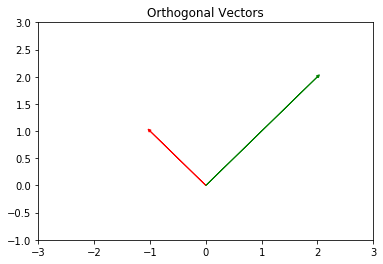

In [46]:
vector_1 = [-1,1]
vector_2 = [2,2]
# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# No, the dot product is not zero. Operation is not legal?
matrix_a = np.array([[-5],
                     [3],
                     [7]
                     ])
matrix_b = np.array([[6],
                     [-8],
                     [2]
                     ])
matrix_a.dot(matrix_b)

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [58]:
matrix_c = np.array([2,-15,6,20])
c_norm = np.linalg.norm(matrix_c)
c_norm**2

665.0

In [59]:
matrix_c.dot(matrix_c)

665

In [62]:
cT = matrix_c.T
cT_c = cT*matrix_c
cT_c

array([  4, 225,  36, 400])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [0]:
matrix_d = np.array[
                    [7],
                    [12]
]
matrix_e = np.array([
                     [2],
                     [11],
                     [-8]
])



## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [65]:

matrix_f = np.array([4,12,11,9,2])
f_norm = np.linalg.norm(matrix_f)
unit_f = matrix_f/f_norm
unit_f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
# Plot Linearly Dependent Vectors


matrix_f = np.array([4,12,11,9,2])
f_norm = np.linalg.norm(matrix_f)
unit_f = matrix_f/f_norm
unit_f

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,0] 

# Scaled Vectors
v2 = np.multiply(3, v)
v3 = np.multiply(-1,v)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

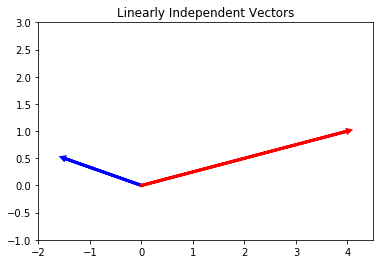

In [66]:
# Axis Bounds
plt.xlim(-2,4.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [4, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [5]:
matrix_g = np.array([1,2])
matrix_h = np.array([4,8])
g_norm = np.linalg.norm(matrix_g)
h_norm = np.linalg.norm(matrix_h)
unit_g = matrix_g/g_norm
unit_h = matrix_h/h_norm 

span_g = np.add(matrix_g,unit_g)
span_h = np.add(matrix_h,unit_h)
print(span_g)
print(span_h)

[1.4472136  2.89442719]
[4.4472136  8.89442719]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [6]:
matrix_l = np.array([1,2,3])
matrix_m = np.array([-1,0,7])
matrix_n = np.array([4,8,2])
l_norm = np.linalg.norm(matrix_l)
m_norm = np.linalg.norm(matrix_m)
n_norm = np.linalg.norm(matrix_n)
unit_l = matrix_l/l_norm
unit_m = matrix_m/m_norm 
unit_n = matrix_n/n_norm
span_l = np.add(matrix_l,unit_l)
span_m = np.add(matrix_m,unit_m)
span_n = np.add(matrix_n,unit_n)
print(span_l)
print(span_m)
print(span_n)

[1.26726124 2.53452248 3.80178373]
[-1.14142136  0.          7.98994949]
[4.43643578 8.87287156 2.21821789]


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


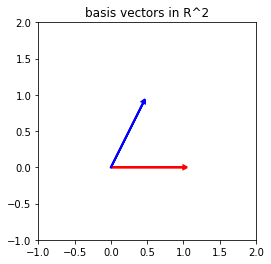

In [9]:
# Axis Bounds
plt.xlim(-1,2)          
plt.ylim(-1,2)

# Unit Vectors
vec_1 = np.array([1,0])
vec_2 = np.array([1,2])
vec_1_norm = np.linalg.norm(vec_1)
vec_2_norm = np.linalg.norm(vec_2)

unit_1 = vec_1/vec_1_norm
unit_2 = vec_2/vec_2_norm 


# Fix Axes
plt.axes().set_aspect('equal')

# PLot Vectors
plt.arrow(0, 0, unit_1[0], unit_1[1], linewidth=2, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, unit_2[0], unit_2[1], linewidth=2, head_width=.05, head_length=0.05, color ='blue')
plt.title("basis vectors in R^2")
plt.show()

## 6.2 What does it mean to form a basis?

The basis of a vector space is a set of vectors that are linearly independent and that span that vector space 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [11]:
matrix_p = np.array([
                     [1,2,3],
                     [-1,0,7],
                     [4,8,2]
])

np.linalg.matrix_rank(matrix_p)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the vector space spanned by its columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


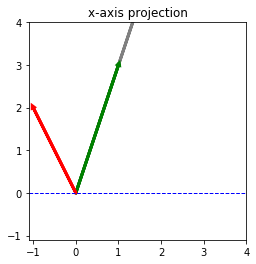

In [12]:
# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,3] 
w = [-1,2]
proj = np.multiply(2,v)

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("x-axis projection")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

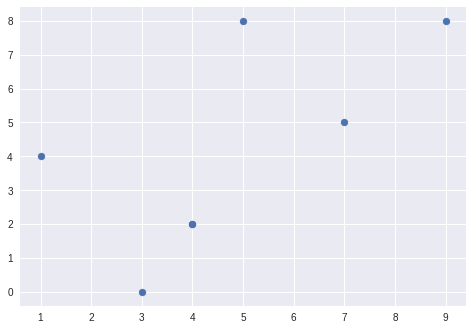

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()